'Author - Mahid Anjum (mahidanjum@gmail.com)'

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.integrate


(0.0, 3.0)

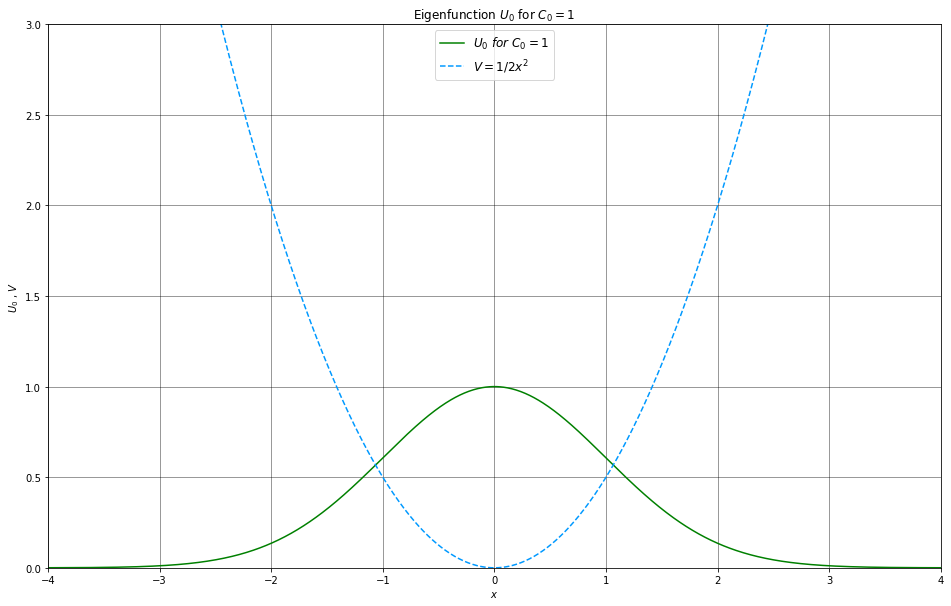

In [3]:
#bi

c0=1
x=np.linspace(-4,4,1000)

u0=c0*np.exp(-x**2/2)
v=1/2*x**2

plt.figure(figsize=(16,10))                                                      

ax=plt.axes()                                                                   

ax.grid(color='black',alpha=0.5)                                             


ax.plot(x,u0,color=(0,0.5,0))                                                               
ax.plot(x,v,'--', color=(0,0.6,1)) 
 
ax.set_title('Eigenfunction $U_0$ for $C_0 = 1$')                                                               
ax.set_xlabel('$x$')                                                              
ax.set_ylabel('$U_0$ , $V$')    
ax.legend(('$U_0$ $for$ $C_0=1$','$V=1/2x^2$'), fontsize=12, loc= 'upper center')     


plt.xlim(-4,4)
plt.ylim(0,3)                                                     




(-4.0, 4.0)

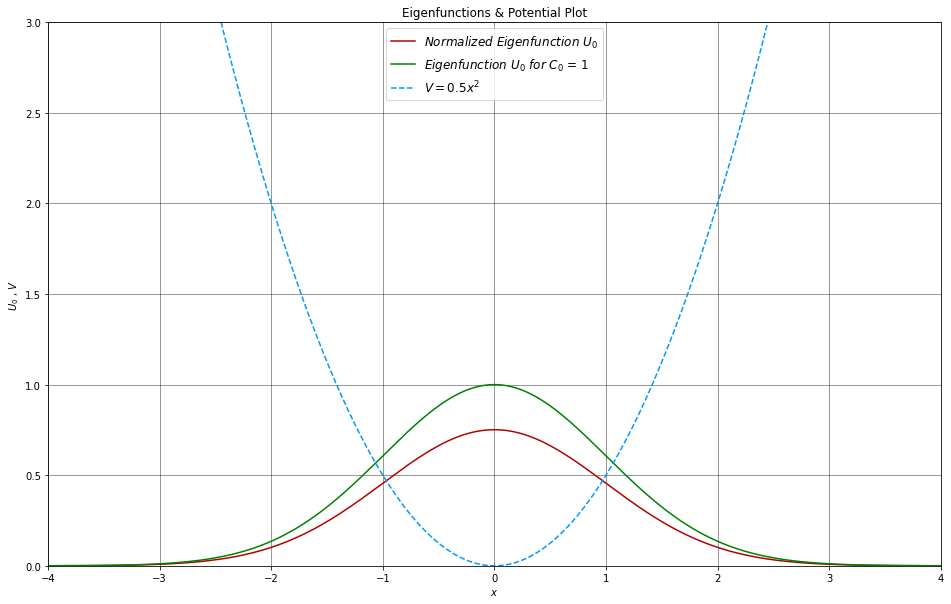

In [4]:
#bii

c0_1=1/(np.pi)**(1/4)
x0_1=np.linspace(-4,4,1000)

u0_1=c0_1*np.exp(-x**2/2)
v=1/2*x0_1**2

plt.figure(figsize=(16,10))                                                      

ax1=plt.axes()                                                                   

ax1.grid(color='black',alpha=0.5)                                             


ax1.plot(x0_1,u0_1,color=(0.7,0,0))                                                               

ax1.plot(x,u0,color=(0,0.5,0))
ax1.plot(x0_1,v,'--', color=(0,0.6,1))   

 
ax1.set_title('Eigenfunctions & Potential Plot')                                                               
ax1.set_xlabel('$x$')                                                              
ax1.set_ylabel('$U_0$ , $V$')    
ax1.legend(('$Normalized$ $Eigenfunction$ $U_0$','$Eigenfunction$ $U_0$ $for$ $C_0$ = $1$','$V=0.5x^2$'), fontsize=12, loc= 'upper center')    

plt.ylim(0,3)
plt.xlim(-4,4)                                                      



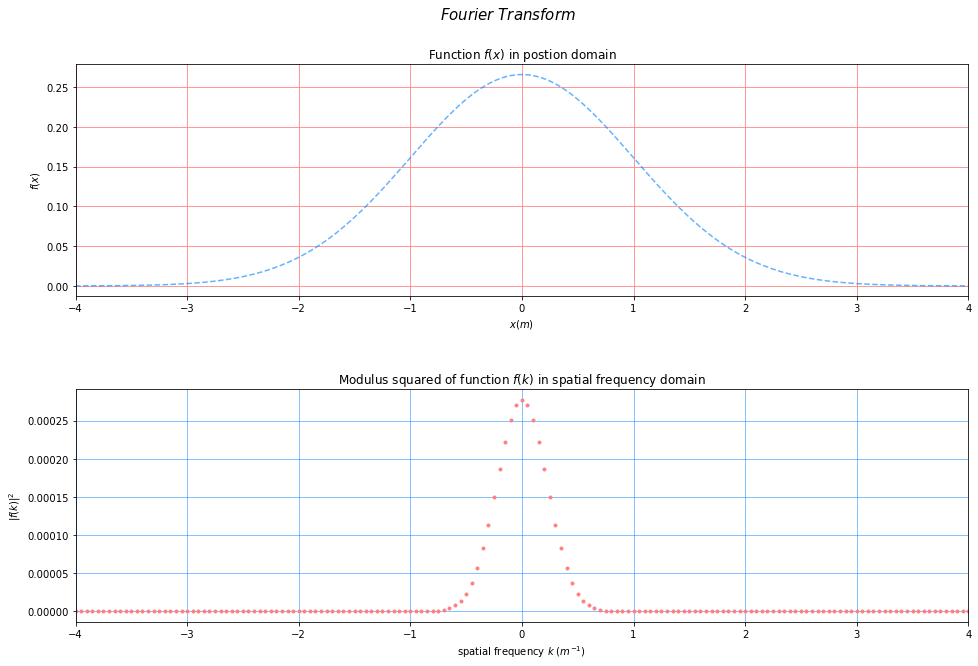

In [5]:
#d

#function in position domain

fig, (ax,ax1)=plt.subplots(2,1,figsize=(16,10))

fig.suptitle('$Fourier$ $Transform$', fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)

N=1024
duration=20
deltax=duration/N


xvals=np.linspace(-(N-1)*deltax,(N-1)*deltax,N)

c0=1/(np.sqrt(8)*np.pi**0.25)

function=c0*np.exp(-(xvals**2)/2)

ax.plot(xvals,function,'--',color=(0,0.5,1),alpha=0.6)
ax.set_title('Function $f(x)$ in postion domain')                                                               
ax.set_xlabel('$x(m)$')  
ax.set_xlim(-4,4)
ax.set_ylim()                                                            
ax.set_ylabel('$f(x)$')
ax.grid(color=(1,0.5,0.5),alpha=1)

#fourier transform

deltak=1/(N*deltax)

kvals=np.linspace(0,(N-1)*deltak,N)
kvals=kvals - N/2*(deltak)


transform=np.fft.fft(function)/N
transform=np.fft.fftshift(transform)


ax1.plot(kvals,transform.real**2,'.',color=(1,0.5,0.5),alpha=1)
ax1.set_title('Modulus squared of function $f(k)$ in spatial frequency domain')                                                               
ax1.set_xlabel('spatial frequency $k$ $(m^{-1})$')                                                            
ax1.set_ylabel('$|f(k)|^2$')
ax1.set_xlim(-4,4)
ax1.grid(color=(0,0.5,1),alpha=0.6)





$Since$ $p=\hbar k$ , $the$ $expectation$ $value$ $of$ $<p>$ $should$ $be$ $0$ ($noted$ $from$ $the$ $graph$).

In [7]:
#code to find the corresponding value of E for wihch |U[1000]| < 1. Part e(4)

#initialising empty arrays 

U=np.zeros(1001)
x=np.zeros(1001)
V=np.zeros(1001)

#guessing array for E to be used in the loop later

Eguess=np.arange(1.2,2,0.001)

#initial conditions

deltax=0.008

U[0]=0
U[1]=10**-6

x[0]=-4
x[1]= x[0] + deltax

V[0]=0.5*(x[0]**2)
V[1]=0.5*(x[1]**2)



for E in Eguess:                                                                    #for loop to vary the values of E in Eguess with step size 0.001
    for n in range(1,1000):                                                         #for loop inside the original for loop to find out the U[1000] value for each Eguess
        x[n+1] = x[n] + deltax
        V[n+1] = 0.5*(x[n+1])**2
        U[n+1] = 2*U[n] - (2*(deltax**2)*U[n]*(E-V[n+1]))- (U[n-1])   
    
    if np.abs(U[1000]) < 0.001:                                                     #if condition to only find out the E for which U[1000] < 0.001

        print('For only the following value of E %.2f :'%E,',|U[1000]| < 0.001 i.e',np.abs(U[1000]))

For only the following value of E 1.50 : ,|U[1000]| < 0.001 i.e 1.1022048454571675e-05


(-4.0, 4.0)

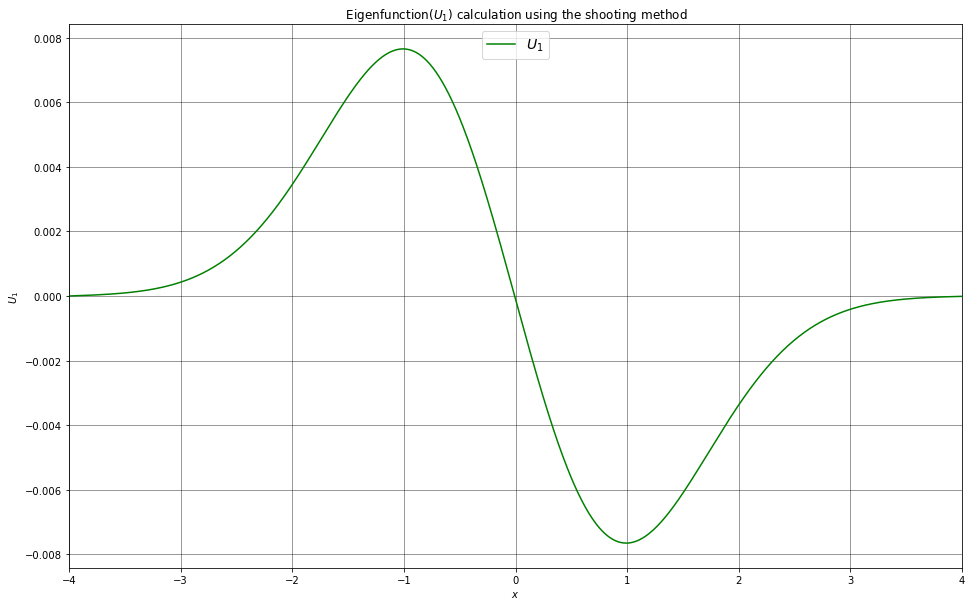

In [8]:
#code to plot the wavefunction with the value of E found previously by putting in the relevant condition. e(5)




#initialising empty arrays 

U=np.zeros(1001)
V=np.zeros(1001)
x=np.zeros(1001)

#initial conditions

E=1.5                                                          #value of E found out by putting in the condition in last part/cell
deltax=0.008

U[0]=0
U[1]=10**-6

x[0]=-4
x[1]= x[0] + deltax

V[0]=0.5*(x[0]**2)
V[1]=0.5*(x[1]**2)

#updating the empty arrays

n=1

while n<= 999:
    x[n+1] = x[n] + deltax
    V[n+1] = 0.5*(x[n+1])**2
    U[n+1] = 2*U[n] - (2*(deltax**2)*U[n]*(E-V[n+1]))- (U[n-1])
    n=n+1


#plotting


plt.figure(figsize=(16,10))

ax=plt.axes()  
ax.grid(color='black',alpha=0.5)

ax.set_title(' Eigenfunction($U_1$) calculation using the shooting method ')                                                               
ax.set_xlabel('$x$')                                                              
ax.set_ylabel('$U_1$')  

ax.plot(x,U,label=r'$U_1$',color=(0,0.5,0))   

ax.legend(fontsize='14', loc='upper center')

ax.set_xlim(-4,4)

If we Guess the wrong value E of Energy we input, then the wavefunction either diverges or undershoots. This is because that wrongly guessed value doesnot give the right eigenvalue for that particular eigenfunction.
However if we have the rightly guessed value for Energy(1.50) in this case, the wavefunction doesnot diverge or undershoot because the right eigenvalue is given for that particular eigenfuncfunction.This means the wavefunction is in an eigenstate with that particular eigenvalue. This suggests that the correct energy eigenvalue for n=1 state is 1.50.

(-4.0, 4.0)

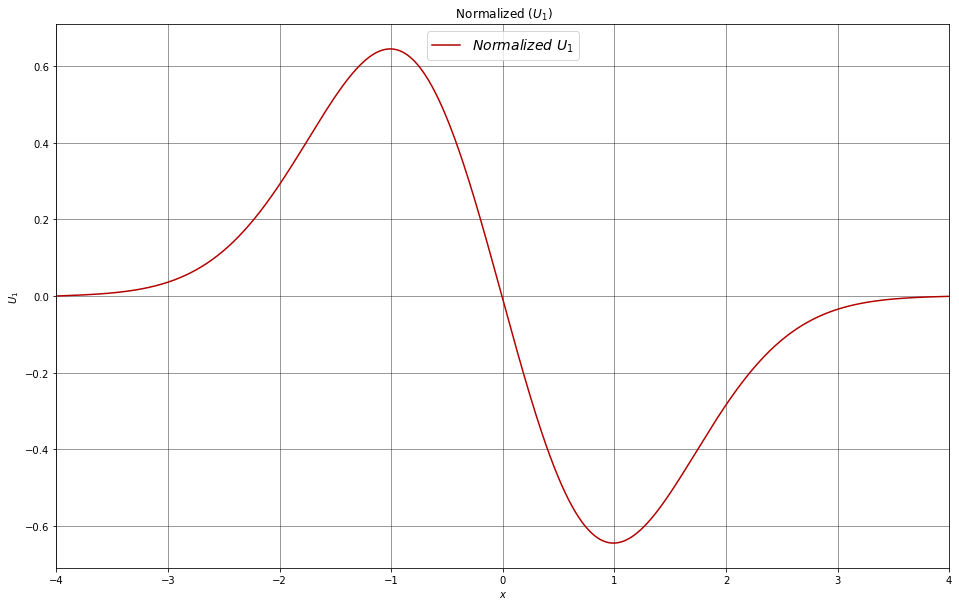

In [9]:
#initialising empty arrays 

U=np.zeros(1001)
V=np.zeros(1001)
x=np.zeros(1001)

#initial conditions

E=1.5                                                          #value of E found out by putting in the condition in last part/cell (using the shooting method)
deltax=0.008

U[0]=0
U[1]=10**-6

x[0]=-4
x[1]= x[0] + deltax

V[0]=0.5*(x[0]**2)
V[1]=0.5*(x[1]**2)

#updating the empty arrays

n=1

while n<= 999:
    x[n+1] = x[n] + deltax
    V[n+1] = 0.5*(x[n+1])**2
    U[n+1] = 2*U[n] - (2*(deltax**2)*U[n]*(E-V[n+1]))- (U[n-1])
    n=n+1


#Normalizing the wavefunction e(6)

integral_U1_squared = scipy.integrate.simps((abs(U))** 2, x)
normalized_U1= U/np.sqrt(integral_U1_squared)

#plotting


plt.figure(figsize=(16,10))

ax=plt.axes()  
ax.grid(color='black',alpha=0.5)

ax.set_title(' Normalized ($U_1$)')                                                               
ax.set_xlabel('$x$')                                                              
ax.set_ylabel('$U_1$')  

ax.plot(x,normalized_U1,label=r'$Normalized$ $U_1$',color=(0.7,0,0))  

ax.legend(fontsize='14', loc='upper center')
ax.set_xlim(-4,4)


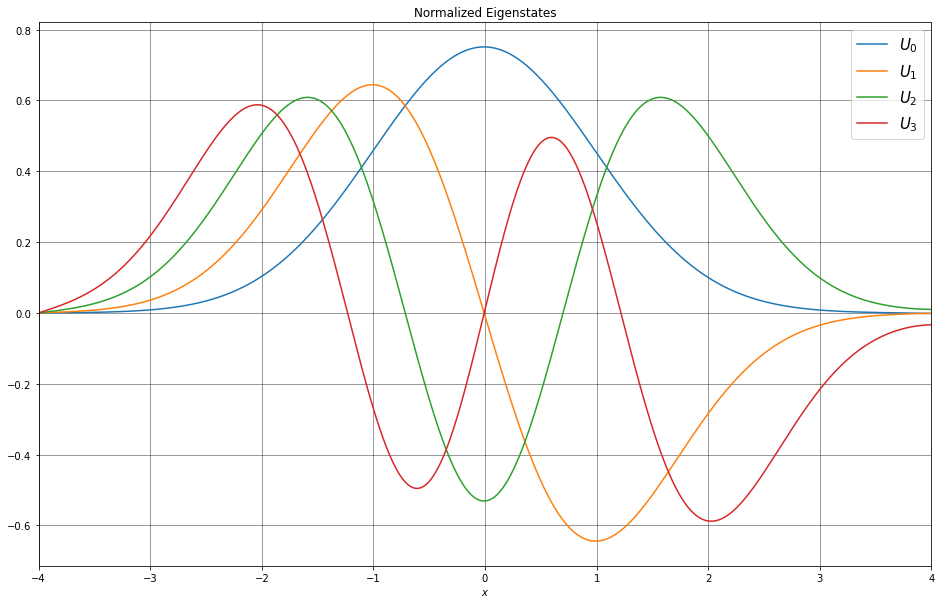

In [5]:
#Different eigenstates on the same axes using the shooting method

#initialising empty arrays 

U=np.zeros(1001)
V=np.zeros(1001)
x=np.zeros(1001)

#initial conditions

E=0.5                                                          #value of E found out by putting in the condition in last part/cell
deltax=0.008

U[0]=0
U[1]=10**-6

x[0]=-4
x[1]= x[0] + deltax

V[0]=0.5*(x[0]**2)
V[1]=0.5*(x[1]**2)

#updating the empty arrays

n=1

while n<= 999:
    x[n+1] = x[n] + deltax
    V[n+1] = 0.5*(x[n+1])**2
    U[n+1] = 2*U[n] - (2*(deltax**2)*U[n]*(E-V[n+1]))- (U[n-1])
    n=n+1


#Normalizing the wavefunction e(6)

integral_U0_squared = scipy.integrate.simps((abs(U))** 2, x)
normalizied_U0= U/np.sqrt(integral_U0_squared)


#initialising empty arrays 

U=np.zeros(1001)
V=np.zeros(1001)
x=np.zeros(1001)

#initial conditions

E=1.5                                                          #value of E found out by putting in the condition in last part/cell
deltax=0.008

U[0]=0
U[1]=10**-6

x[0]=-4
x[1]= x[0] + deltax

V[0]=0.5*(x[0]**2)
V[1]=0.5*(x[1]**2)

#updating the empty arrays

n=1

while n<= 999:
    x[n+1] = x[n] + deltax
    V[n+1] = 0.5*(x[n+1])**2
    U[n+1] = 2*U[n] - (2*(deltax**2)*U[n]*(E-V[n+1]))- (U[n-1])
    n=n+1


#Normalizing the wavefunction e(6)

integral_U1_squared = scipy.integrate.simps((abs(U))** 2, x)
normalizied_U1= U/np.sqrt(integral_U1_squared)

#initialising empty arrays 

U=np.zeros(1001)
V=np.zeros(1001)
x=np.zeros(1001)

#initial conditions

E=2.5                                                          #value of E found out by putting in the condition in last part/cell
deltax=0.008

U[0]=0
U[1]=10**-6

x[0]=-4
x[1]= x[0] + deltax

V[0]=0.5*(x[0]**2)
V[1]=0.5*(x[1]**2)

#updating the empty arrays

n=1

while n<= 999:
    x[n+1] = x[n] + deltax
    V[n+1] = 0.5*(x[n+1])**2
    U[n+1] = 2*U[n] - (2*(deltax**2)*U[n]*(E-V[n+1]))- (U[n-1])
    n=n+1


#Normalizing the wavefunction e(6)

integral_U2_squared = scipy.integrate.simps((abs(U))** 2, x)
normalizied_U2= U/np.sqrt(integral_U2_squared)

#initialising empty arrays 

U=np.zeros(1001)
V=np.zeros(1001)
x=np.zeros(1001)

#initial conditions

E=3.5                                                          #value of E found out by putting in the condition in last part/cell
deltax=0.008

U[0]=0
U[1]=10**-6

x[0]=-4
x[1]= x[0] + deltax

V[0]=0.5*(x[0]**2)
V[1]=0.5*(x[1]**2)

#updating the empty arrays

n=1

while n<= 999:
    x[n+1] = x[n] + deltax
    V[n+1] = 0.5*(x[n+1])**2
    U[n+1] = 2*U[n] - (2*(deltax**2)*U[n]*(E-V[n+1]))- (U[n-1])
    n=n+1


#Normalizing the wavefunction e(6)

integral_U3_squared = scipy.integrate.simps((abs(U))** 2, x)
normalizied_U3= U/np.sqrt(integral_U3_squared)

#initialising empty arrays 

U=np.zeros(1001)
V=np.zeros(1001)
x=np.zeros(1001)

#initial conditions

E=5.5                                                          #value of E found out by putting in the condition in last part/cell
deltax=0.008

U[0]=0
U[1]=10**-6

x[0]=-4
x[1]= x[0] + deltax

V[0]=0.5*(x[0]**2)
V[1]=0.5*(x[1]**2)

#updating the empty arrays

n=1

while n<= 999:
    x[n+1] = x[n] + deltax
    V[n+1] = 0.5*(x[n+1])**2
    U[n+1] = 2*U[n] - (2*(deltax**2)*U[n]*(E-V[n+1]))- (U[n-1])
    n=n+1


#Normalizing the wavefunction e(6)

integral_U5_squared = scipy.integrate.simps((abs(U))** 2, x)
normalizied_U5= U/np.sqrt(integral_U5_squared)



#plotting


plt.figure(figsize=(16,10))

ax=plt.axes()  
ax.grid(color='black',alpha=0.5)

ax.set_title('Normalized Eigenstates')                                                               
ax.set_xlabel('$x$')                                                              


ax.plot(x,normalizied_U0,label='$U_0$')
ax.plot(x,normalizied_U1,label='$U_1$')
ax.plot(x,normalizied_U2,label='$U_2$')  
ax.plot(x,normalizied_U3,label='$U_3$')  
#ax.plot(x,normalizied_U5,label='$U_5$') 


ax.set_xlim(-4,4)

ax.legend(fontsize=15) 




